In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Explanatory Data Analysis

## Airbnb NYC Listings: Overview

In [2]:
df_clean = pd.read_csv('C:\\Users\\micah\\OneDrive\\Documents\\project3_for_udacity\\Data\\Clean Data\\df_clean.csv')
df_clean.shape

(22140, 13)

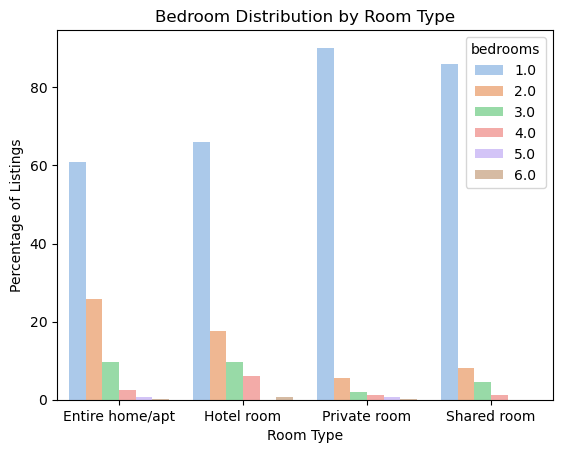

In [3]:
# The few lines below allows us to use the percentage of listings that have x amount of bedrooms per room type
room_bed_counts = df_clean.groupby(['room_type','bedrooms']).size().reset_index(name='count')
room_totals = df_clean.groupby('room_type').size().reset_index(name='total')
room_bed_counts = room_bed_counts.merge(room_totals, on='room_type')
room_bed_counts['percent'] = room_bed_counts['count'] / room_bed_counts['total'] * 100
room_bed_counts = room_bed_counts[room_bed_counts['bedrooms'].between(1, 6)]

sns.barplot(data=room_bed_counts, x='room_type', y='percent', hue='bedrooms', palette='pastel')
plt.ylabel('Percentage of Listings')
plt.xlabel('Room Type')
plt.title('Bedroom Distribution by Room Type');

Key take-away: Most listings contain a single bedroom, but entire homes slightly outnumber private rooms.

## How Price Relates to Bedrooms, Bathrooms, and Beds

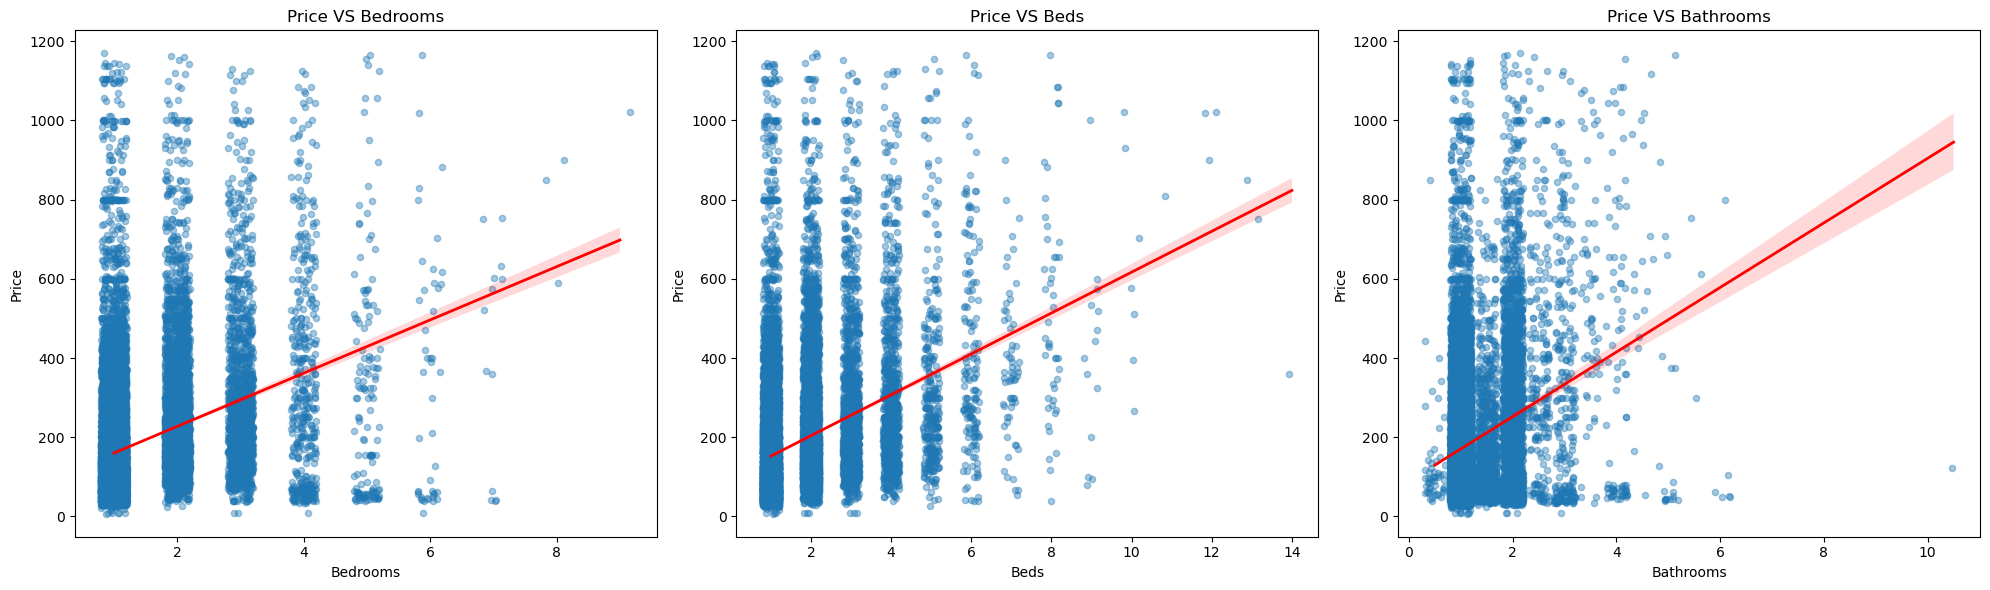

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
price_cap = df_clean['price'].quantile(0.99)
df_filtered = df_clean[df_clean['price'] <= price_cap]

sns.regplot(df_filtered, x='bedrooms', y='price', line_kws={'color':'red', 'linewidth':2}, scatter_kws={'alpha':0.4, 's':20}, x_jitter=0.2, ax=axes[0])
axes[0].set_title('Price VS Bedrooms')
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Price')

sns.regplot(df_filtered, x='beds', y='price', line_kws={'color':'red', 'linewidth':2}, scatter_kws={'alpha':0.4, 's':20}, x_jitter=0.2, ax=axes[1])
axes[1].set_title('Price VS Beds')
axes[1].set_xlabel('Beds')
axes[1].set_ylabel('Price')

sns.regplot(df_filtered, x='bathrooms', y='price', line_kws={'color':'red', 'linewidth':2}, scatter_kws={'alpha':0.4, 's':20}, x_jitter=0.2, ax=axes[2])
axes[2].set_title('Price VS Bathrooms')
axes[2].set_xlabel('Bathrooms')
axes[2].set_ylabel('Price')
plt.tight_layout();

Key take-away: Listings with more bedrooms, bathrooms, or beds generally command higher prices, though most listings cluster at the low end.

## Outliers in Pricing Across Room Types

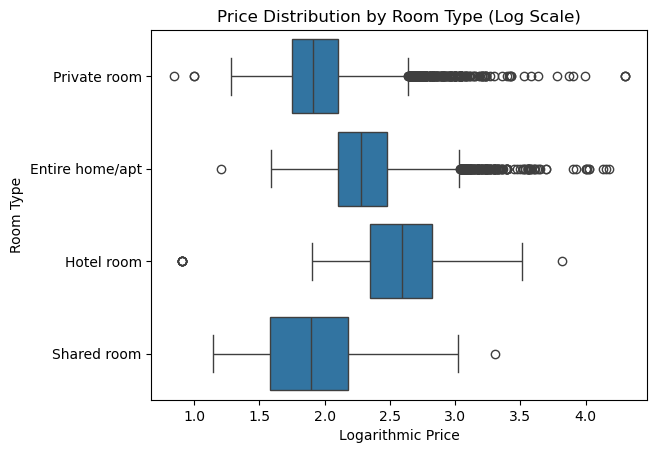

In [5]:
sns.boxplot(df_clean, x='log_price', y='room_type')
plt.xlabel('Logarithmic Price')
plt.ylabel('Room Type')
plt.title('Price Distribution by Room Type (Log Scale)');

Key take-away: Private and Entire home/apt show the largest number of extreme high-price listings, suggesting that while rare, some hosts charge significantly more for these room types.

## Does Being a Superhost Affect Price?

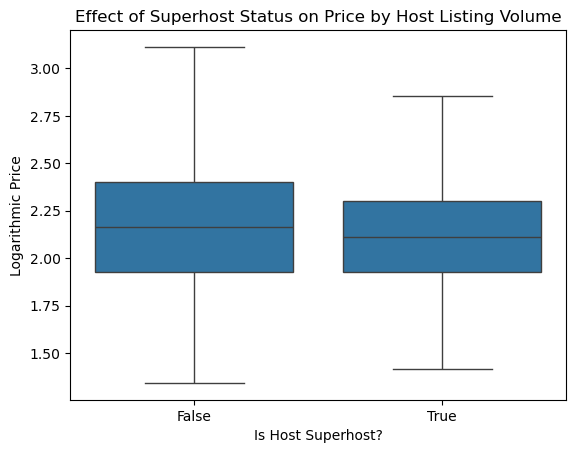

In [6]:
sns.boxplot(df_clean, x='host_is_superhost', y='log_price', showfliers=False)
plt.xlabel('Is Host Superhost?')
plt.ylabel('Logarithmic Price')
plt.title('Effect of Superhost Status on Price by Host Listing Volume');

Key take-away: Superhost status does not appear to significantly affect price; the median and spread of prices are similar for superhosts and non-superhosts.

# Conclusion

This analysis explored multiple variables and their effect on price across NYC Airbnb listings using structured data cleaning, feature engineering, and multilevel exploratory analysis. The key findings from this analyst indicate that price is heavily right skewed with extreme listings causing inflated average values. By using log transformations I was able to reveal a more normalized distribution for modeling. Bedrooms, bathrooms, and bed count have a positive relationship with price with Manhattan displaying a location premium across each neighbourhood. Room type was a major factor affecting listing price with hotel rooms being by far the most expensive option. However, superhost status didn't have a strong correlation to price suggesting there are other factors that are affecting price to a greater extent. Overall, NYC Airbnb inventory is concentrated in smaller units, though Entire home/apt listings slightly outnumber Private rooms.

Limitations include the absence of amenity data, occupancy rates, review metrics, and seasonal effects. Future analysis could implement regression modeling, clustering techniques, or time-series analysis to quantify pricing elasticity and host segmentation.

This project demonstrates end-to-end analytical workflow, from structured data cleaning through multivariate exploration and business-focused interpretation.